In [250]:
import keras
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# load data 

In [251]:
df = pd.read_csv("data/data.csv")

In [252]:
# Getting the values and plotting it
f1 = df['V1'].values
f2 = df['V2'].values
plt.scatter(f1, f2, c='black', s=7)

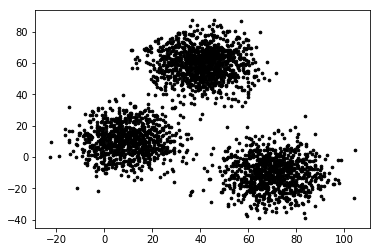

In [253]:
plt.show()

# Main

In [254]:
def get_distance(point_data,points_K):
    distance =[]
    for i in points_K:    
        distance.append(math.hypot(i[0]-point_data[0],i[1]-point_data[1]))
    return distance

def random_points(k,df):
    x = np.random.randint (df['V1'].min(),df['V1'].max(),size=K)
    y = np.random.randint (df['V2'].min(),df['V2'].max(),size=K)
    points = np.array(list(zip(x,y)),dtype=np.float32)
    return points

def get_new_pointsK(df,k):
    points_k =[]
    for i in range(k):
        df_cluster = (df.loc[df['cluster'] == i])['point_data']
        x = 0
        y = 0
        for i in df_cluster:
            x += i[0]
            y += i[1]
        x = x/float(df_cluster.shape[0])
        y = y/float(df_cluster.shape[0])
        points_k.append((x,y))
    return points_k

In [257]:
df['point_data'] = df[['V1','V2']].apply(tuple, axis=1)

In [258]:
itr = 5
K=3

In [259]:
def kmeans (itr,k,df):
    
    for i in range(itr) :
        if i == 0:
            points_k = random_points(k,df)
            print(points_k)
            df['distance'] = df['point_data'].apply(lambda x: get_distance(x,points_k))
            df['cluster'] = df['distance'].apply(lambda x : np.argmin(x))
            f1 = df['V1'].values
            f2 = df['V2'].values
            plt.scatter((df.loc[df['cluster'] == 0])['V1'],(df.loc[df['cluster'] == 0])['V2'] ,c='b',s=7)
            plt.scatter((df.loc[df['cluster'] == 1])['V1'],(df.loc[df['cluster'] == 1])['V2'] ,c='r',s=7)
            plt.scatter((df.loc[df['cluster'] == 2])['V1'],(df.loc[df['cluster'] == 2])['V2'] ,c='g',s=7)
            plt.scatter(points_k[0][0],points_k[0][1],marker="*",c='black')
            plt.scatter(points_k[1][0],points_k[1][1],marker="*",c='black')
            plt.scatter(points_k[2][0],points_k[2][1],marker="*",c='black')
            plt.show()
            
        else:
        
            points_k = get_new_pointsK(df,k)
            print(points_k)
            df['distance'] = df['point_data'].apply(lambda x: get_distance(x,points_k))
            df['cluster'] = df['distance'].apply(lambda x : np.argmin(x))
            f1 = df['V1'].values
            f2 = df['V2'].values
            plt.scatter((df.loc[df['cluster'] == 0])['V1'],(df.loc[df['cluster'] == 0])['V2'] ,c='b',s=7)
            plt.scatter((df.loc[df['cluster'] == 1])['V1'],(df.loc[df['cluster'] == 1])['V2'] ,c='r',s=7)
            plt.scatter((df.loc[df['cluster'] == 2])['V1'],(df.loc[df['cluster'] == 2])['V2'] ,c='g',s=7)
            plt.scatter(points_k[0][0],points_k[0][1],marker="*",c='black')
            plt.scatter(points_k[1][0],points_k[1][1],marker="*",c='black')
            plt.scatter(points_k[2][0],points_k[2][1],marker="*",c='black')
            plt.show()
    return points_k

[[ 30.  42.]
 [  3.  38.]
 [ 39. -12.]]


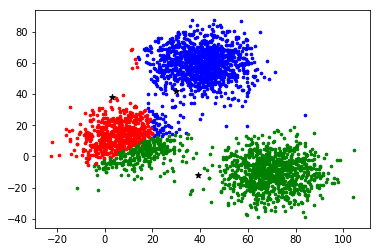

[(40.104873973399776, 57.79491763923523), (5.097933607457045, 14.498057780756017), (58.12420948506164, -7.719121360577775)]


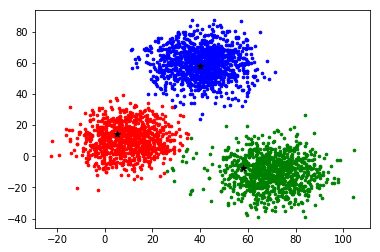

[(40.66312734374994, 59.636417534722256), (9.08564631661765, 10.79935965523755), (69.45896393153521, -10.022161659680496)]


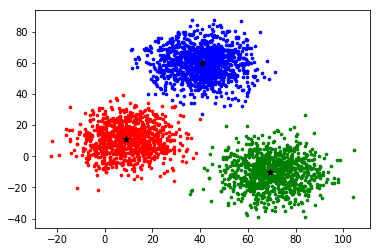

[(40.68362784160133, 59.7158927415144), (9.478045899766407, 10.686052004816457), (69.92418447478987, -10.119641194361344)]


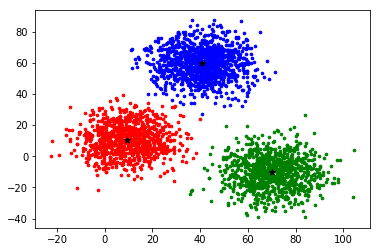

[(40.68362784160133, 59.7158927415144), (9.478045899766407, 10.686052004816457), (69.92418447478987, -10.119641194361344)]


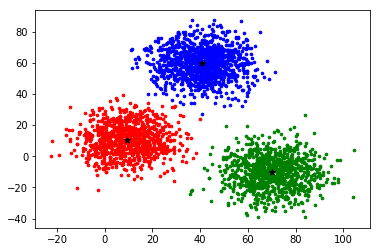

[(40.68362784160133, 59.7158927415144),
 (9.478045899766407, 10.686052004816457),
 (69.92418447478987, -10.119641194361344)]

In [260]:
kmeans(itr,K,df)

In [261]:
df

,V1,V2,point_data,distance,cluster
0,2.072345,-3.241693,"(2.072345, -3.241693)","[73.85451079706827, 15.77423490176277, 68.1995...",1
1,17.936710,15.784810,"(17.93671, 15.78481)","[49.47082273557157, 9.876554634791868, 58.0838...",1
2,1.083576,7.319176,"(1.083576, 7.319176)","[65.67785038464649, 9.044499927021562, 71.0150...",1
3,11.120670,14.406780,"(11.12067, 14.40678)","[54.10068552031074, 4.067189539326974, 63.7134...",1
4,23.711550,2.557729,"(23.71155, 2.557729)","[59.62471893907045, 16.390920469637905, 47.919...",1
5,24.169930,32.024780,"(24.16993, 32.02478)","[32.241276979471046, 25.907388345163753, 62.20...",1
6,21.665780,4.892855,"(21.66578, 4.892855)","[58.02795881067861, 13.494517184197854, 50.539...",1
7,4.693684,12.342170,"(4.693683999999998, 12.34217)","[59.4940809166046, 5.062889056843651, 68.98950...",1
8,19.211910,-1.121366,"(19.21191, -1.121366)","[64.5151665753977, 15.302392958693753, 51.5044...",1
9,4.230391,-4.441536,"(4.230391, -4.441536)","[73.79033906245708, 16.011926829414037, 65.938...",1
